# RGB color similarity

rbg revolutionary but gangsta


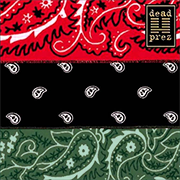

In [13]:
print('rbg revolutionary but gangsta')
from IPython.display import Image
Image(filename='rgb.png')

#### create list of rgb's

In [2]:
import numpy as np
import itertools
import time

In [3]:
rbg_list = list(itertools.permutations(np.arange(255), 3))
rbg_set = set(rbg_list)
print(len(rbg_list))
print(len(rbg_set))

16386810
16386810


In [4]:
sample1 = rbg_list[np.random.randint(len(rbg_list))]
sample2= rbg_list[np.random.randint(len(rbg_list))]
print(sample1, ' | ', sample2)
len(sample1) == len(sample2)

(4, 143, 82)  |  (135, 232, 94)


True

In [5]:
length_span = 3
def distance_metric(s1,s2):
    diff_base = 0
    for x in np.arange(length_span):
        diff_base += (s1[x] - s2[x])**2
        distance_metric = (diff_base**(1/2.0))
        perc_metric = distance_metric/(((255**2)*length_span)**(1/2.0))
    return ([distance_metric, perc_metric])

In [6]:
print(sample1, sample2)
distance_metric(sample1,sample2)

(4, 143, 82) (135, 232, 94)


[158.82694985423601, 0.35960306765847194]

#### instantiate df object with full set, pick a random sample color to match & calculate distance

In [7]:
# create df object
import pandas as pd
df = pd.DataFrame({'rgb':rbg_list})

In [8]:
# # shuffle and downsample
# df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True).iloc[:1000000,:].copy()
# print(len(df))

In [9]:
sample1 = df['rgb'].values[np.random.randint(len(df))]
print(sample1 in list(df['rgb'].values))
sample1

True


(7, 159, 58)

In [10]:
# -------------------
timer_start = time.time()

df['similarity'] = df['rgb'].apply(distance_metric,s2=sample1)
df['distance'] = df['similarity'].map(lambda x: x[0] )
df['percentage'] = df['similarity'].map(lambda x: x[1] )

completion_time = time.time() - timer_start
print('time:', completion_time)
# -------------------

time: 365.2324459552765


In [11]:
# sort, exclude benchmark color
dfs = df.sort_values(['distance','percentage'],ascending=True).iloc[1:,:].copy()

In [12]:
dfs.head(10)

,rgb,similarity,distance,percentage
425603,"(6, 159, 58)","[1.0, 0.0022641187027]",1.000000,0.002264
489612,"(7, 158, 58)","[1.0, 0.0022641187027]",1.000000,0.002264
489864,"(7, 159, 57)","[1.0, 0.0022641187027]",1.000000,0.002264
489866,"(7, 159, 59)","[1.0, 0.0022641187027]",1.000000,0.002264
490118,"(7, 160, 58)","[1.0, 0.0022641187027]",1.000000,0.002264
554127,"(8, 159, 58)","[1.0, 0.0022641187027]",1.000000,0.002264
425350,"(6, 158, 58)","[1.41421356237, 0.00320194737619]",1.414214,0.003202
425602,"(6, 159, 57)","[1.41421356237, 0.00320194737619]",1.414214,0.003202
425604,"(6, 159, 59)","[1.41421356237, 0.00320194737619]",1.414214,0.003202
425856,"(6, 160, 58)","[1.41421356237, 0.00320194737619]",1.414214,0.003202
